## Homework 2

#### Qingwen Wang

Use the carseats.csv data set in the Lec2 folder. (Column descriptions are at the end of the jupyter notebook we used in class.)

1. Add a column called 'Class' that is 1 if Sales >=8 and 0 otherwise. (Be sure to drop the 'Sales' column once you're done!)

2. One-hot encode the categorical variables (see the pd.get_dummies() function). 

3. Split the data set into training and test sets. Use test_size=0.3, random_state=5 in the train_test_split call.

4. Scale the data using StandardScaler()

5. Use sklearn to fit a logistic regression model on the training set and find the accuracy on the test set.

6. Now use k nearest neighbors to build a classifier. Use the same training and test sets as above. Use cross validation to choose the optimal k.

7. Comment on your results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [38]:
carseats = pd.read_csv('carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [1]:
# cs = carseats.select_dtypes(['number'])
carseats['Class']=np.where(carseats['Sales']>8,1,0)
del carseats['Sales']
carseats = pd.get_dummies(carseats)
carseats.head()

NameError: name 'np' is not defined

In [40]:
X = carseats.drop('Class',axis = 1)
Y = carseats['Class']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [42]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg_scaled = LogisticRegression().fit(X_train_scaled, Y_train)
lg = LogisticRegression().fit(X_train, Y_train)

/Users/qingwenwang/.venv3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
accuracy_score(lg_scaled.predict(X_test_scaled),Y_test)

0.85

In [61]:
accuracy_score(lg.predict(X_test),Y_test)

0.8833333333333333

In [96]:
cvres=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train_scaled, Y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

Text(0, 0.5, 'Acc')

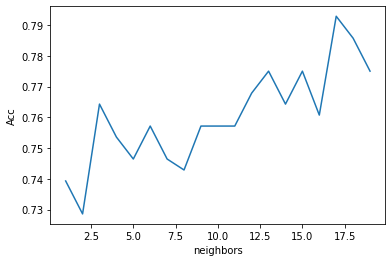

In [97]:
plt.plot(list(range(1,20)),cvres)
plt.xlabel('neighbors')
plt.ylabel('Acc')

In [64]:
np.argmax(cvres)

16

Best result when neighbors = 17

In [65]:
knn = KNeighborsClassifier(n_neighbors=17)
knn17=knn.fit(X_train_scaled,Y_train)
accuracy_score(knn17.predict(X_test_scaled),Y_test)

0.675

KNN Accuaracy = 67.5%; LG Accuracy is 85% <br>
For this dataset, knn has a lower accuracy than logistic regression.<br>
That might because our data in are not much clustering together by class, so KNN does not perform well here.